In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

Step 1: Load the data and undertsnad the data structure
     Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76

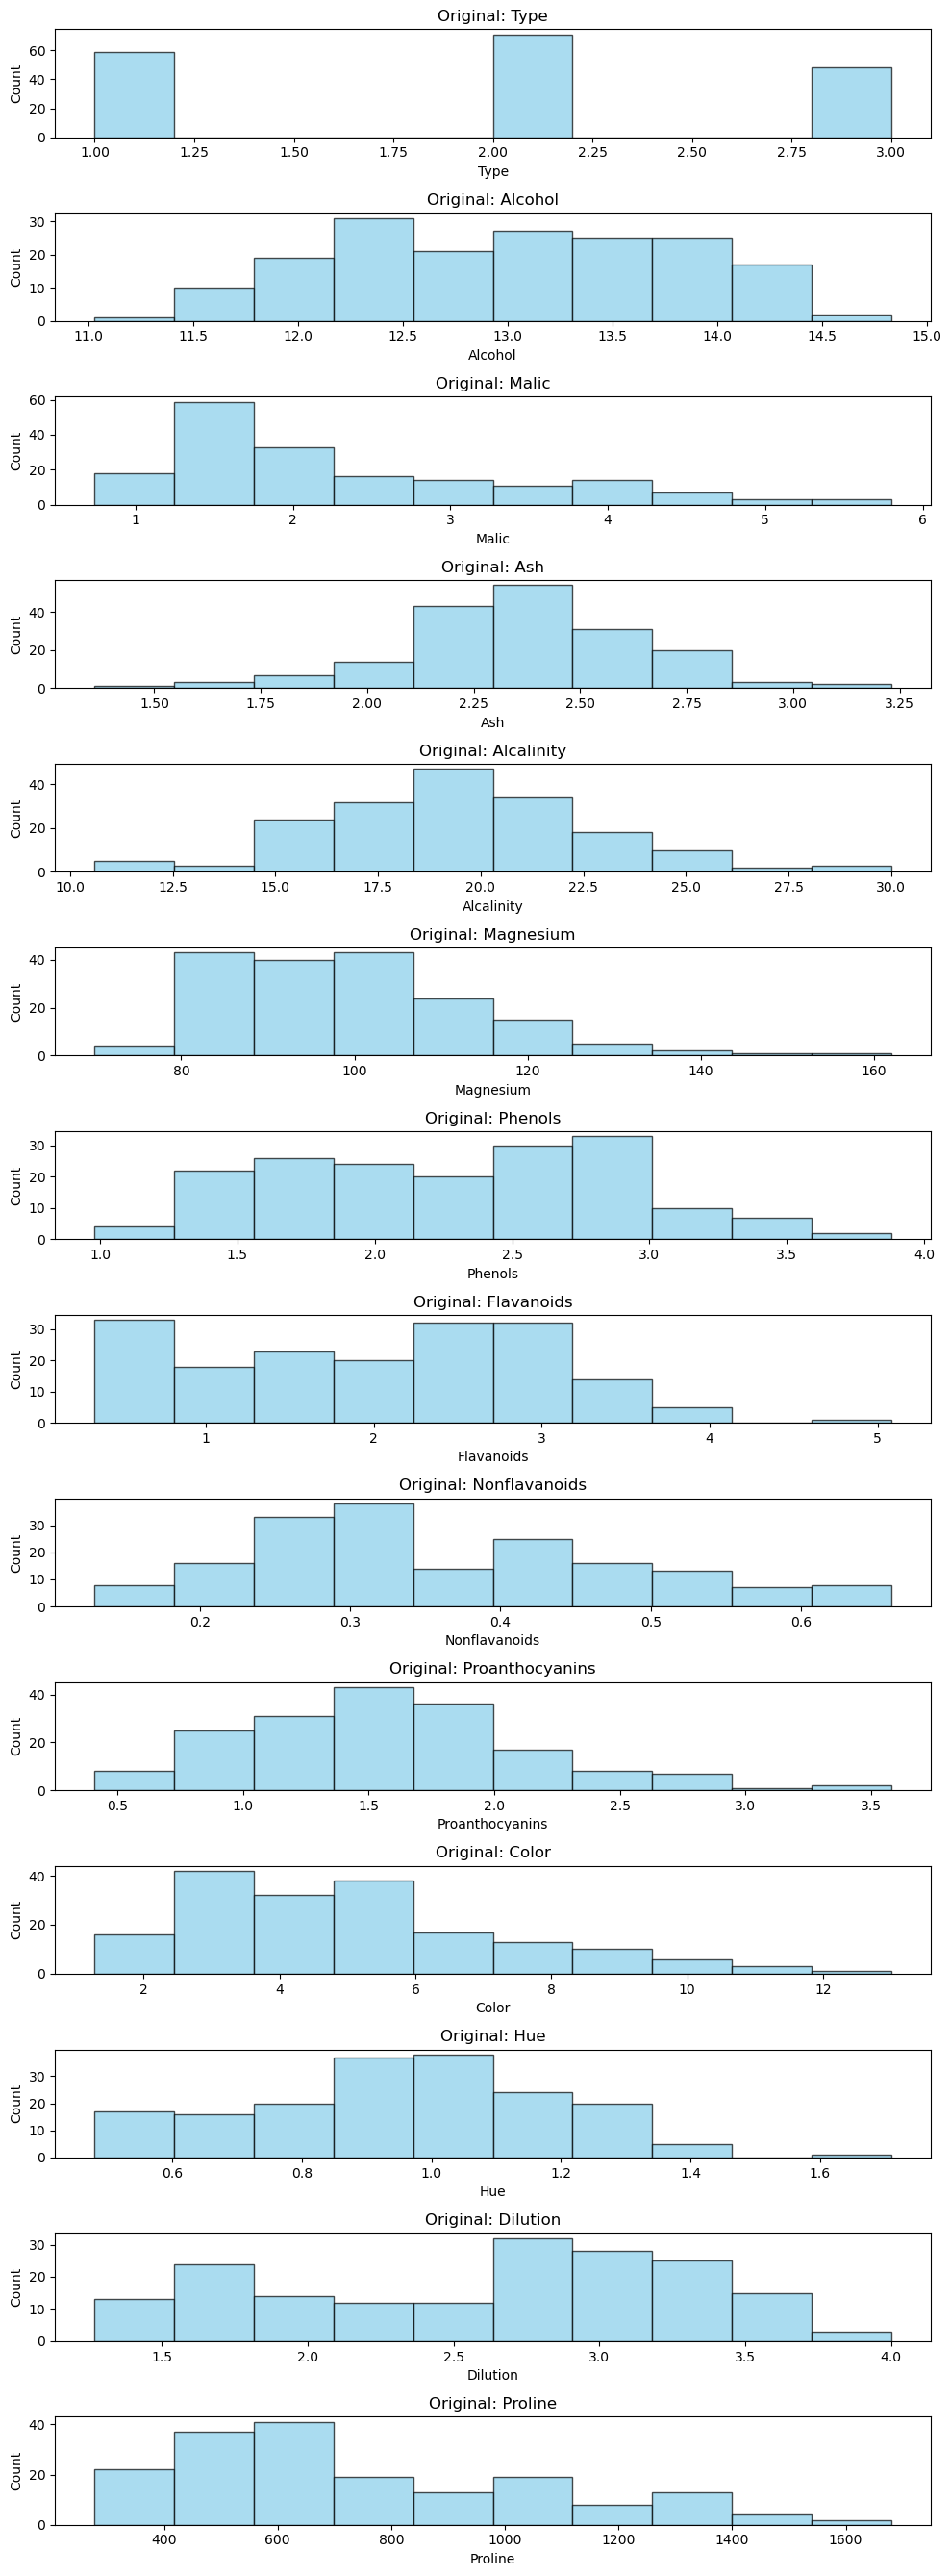

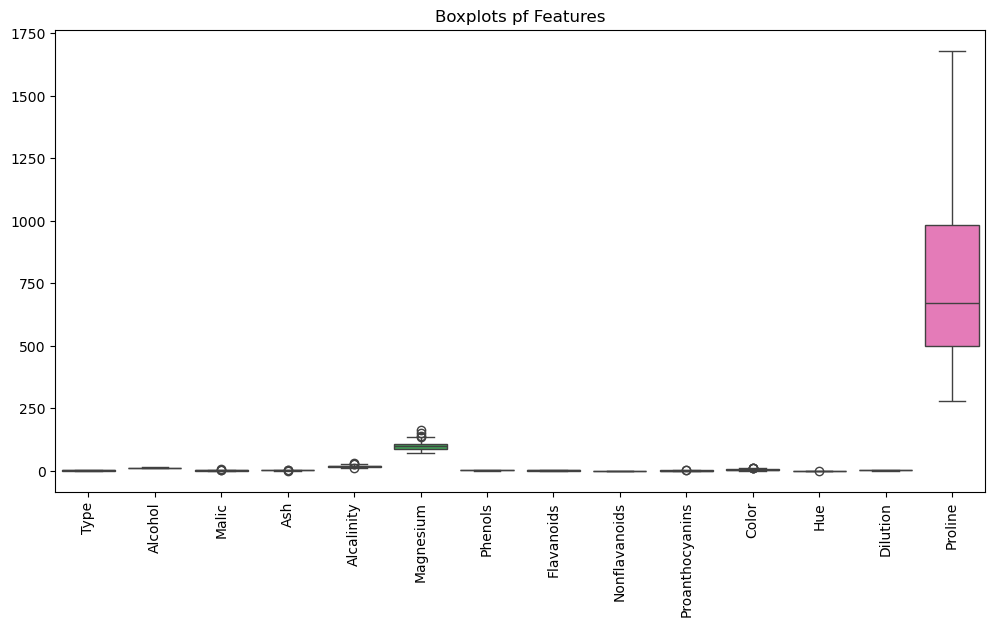

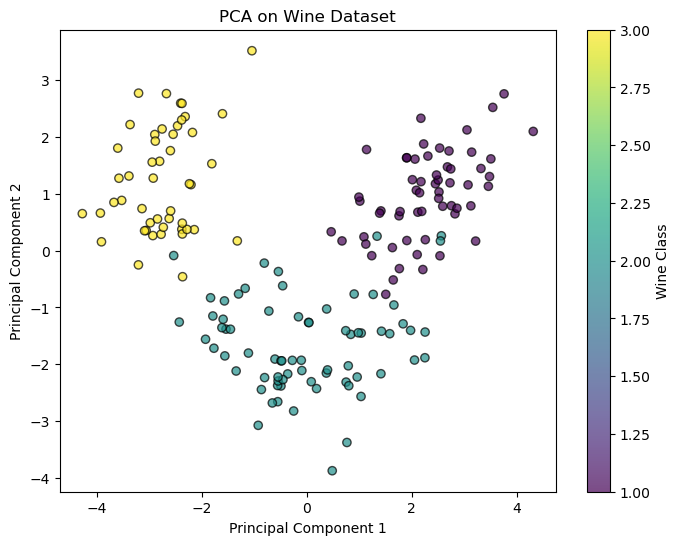

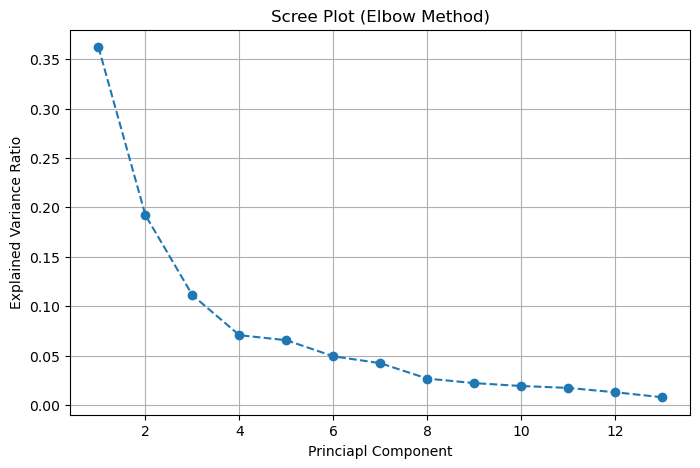


         PC1       PC2       PC3  target
0  3.316751  1.443463 -0.165739       1
1  2.209465 -0.333393 -2.026457       1
2  2.516740  1.031151  0.982819       1
3  3.757066  2.756372 -0.176192       1
4  1.008908  0.869831  2.026688       1


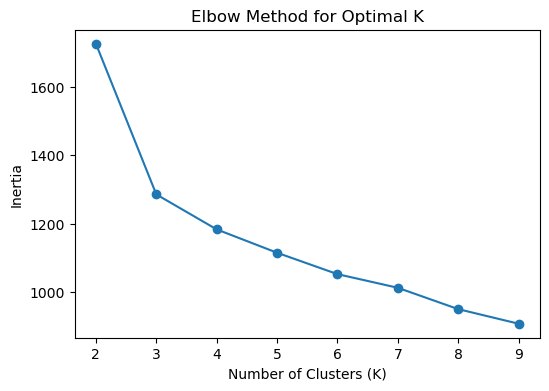


K_Means Silhouette Score: 0.2712


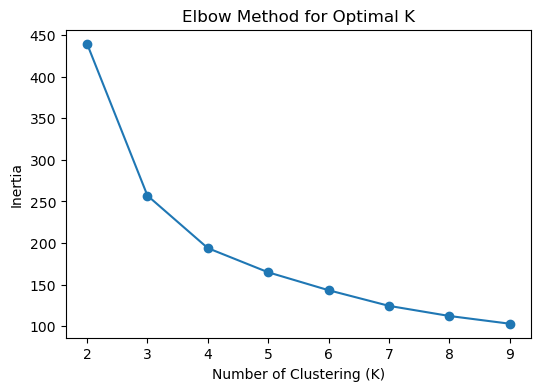


K-Means Silhouette Score : 0.4504


In [22]:
def PCA_test():
    try:
        print("Step 1: Load the data and undertsnad the data structure")
        df_wine = pd.read_csv("wine.csv")
        print(df_wine)

        print("Step 2: Check the data types and column details")
        df_wine.info()

        print("Original Data")
        print(df_wine.describe())
        print(df_wine.dtypes)

        print("\nData Cleaning")
        has_nan = df_wine.isna().any().any()
        print("Does the dataframe have any NaN values?",has_nan)

        count = df_wine.isnull().sum()
        print("\nBelow are the count of missing values according to columns:")
        print(count)

        duplicates = df_wine.duplicated()
        print("Count of duplicate rows")
        print(duplicates.sum())

        fig,axes = plt.subplots(len(df_wine.columns),1,figsize=(10,2 * len(df_wine.columns)),constrained_layout=True)

        for i, col in enumerate(df_wine.columns):
            axes[i].hist(df_wine[col],bins=10,color='skyblue',edgecolor='black',alpha=0.7)
            axes[i].set_title(f"Original: {col}",fontsize=12)
            axes[i].set_ylabel("Count")
            axes[i].set_xlabel(col)

        plt.tight_layout(rect=[0,0,1,0.96])
        plt.show()
    
        plt.figure(figsize=(12,6))
        sns.boxplot(data=df_wine)
        plt.xticks(rotation=90)
        plt.title("Boxplots pf Features")
        plt.show()

        df_wine_copy = df_wine.copy()

        X = df_wine_copy.drop(columns=["Type"]) # Drop categorical target variable
        y = df_wine_copy["Type"]

        #Step 1 : Standardize the dataset
        scaler = StandardScaler()
        X_Scaled = scaler.fit_transform(X)

        #Step 2: Apply PCA
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_Scaled)

        plt.figure(figsize=(8,6))
        plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap='viridis',edgecolors='k',alpha=0.7)
        plt.xlabel("Principal Component 1")
        plt.ylabel("Principal Component 2")
        plt.title("PCA on Wine Dataset")
        plt.colorbar(label='Wine Class')
        plt.show()

        pca_full = PCA()
        pca_full.fit(X_Scaled)

        #Scree Plot
        plt.figure(figsize=(8,5))
        plt.plot(range(1,X.shape[1]+1), pca_full.explained_variance_ratio_,marker='o',linestyle='--')
        plt.xlabel("Princiapl Component")
        plt.ylabel("Explained Variance Ratio")
        plt.title("Scree Plot (Elbow Method)")
        plt.grid()
        plt.show()

        #Transfer the original dataset to the principal component Apply PCA with 3 or 4 component
        pca_1 = PCA(n_components=3) 
        X_pca = pca_1.fit_transform(X_Scaled)

        #Create a dataframe for the transformed data
        df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(3)])
        df_pca["target"] = y # Add target column back for reference

        #Display the first few rows of the transformed dataset
        print("\n",df_pca.head())

        #K-Means to Original data
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(df_wine_copy)

        #K-Means Clustering df_wine_copy
        #Optimal K using elbow method
        inertia =[]
        K_range = range(2,10)

        for k in K_range:
            Kmeans = KMeans(n_clusters= k, random_state=42, n_init=10)
            Kmeans.fit(scaled_data)
            inertia.append(Kmeans.inertia_)

        #Plot Elbow Curve
        plt.figure(figsize=(6,4))
        plt.plot(K_range,inertia,marker='o')
        plt.xlabel("Number of Clusters (K)")
        plt.ylabel("Inertia")
        plt.title("Elbow Method for Optimal K")
        plt.show()

        #Apply K-Means with Optimal K
        optimal_k = 4
        Kmeans = KMeans(n_clusters=optimal_k, random_state=42,n_init=10)
        df_wine_copy['KMeans_Cluster'] = Kmeans.fit_predict(scaled_data)

        #Compute Silhouette Scores
        Kmeans_silhouette = silhouette_score(scaled_data, df_wine_copy['KMeans_Cluster'])
        print(f"\nK_Means Silhouette Score: {Kmeans_silhouette:0.4f}")

        #k-Means to PCA data
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(df_pca)

        #K-Means Clustering 
        #Elbow Method
        inertia = []
        K_range = range(2,10)

        for k in K_range:
            Kmeans = KMeans(n_clusters=k,random_state=42, n_init=10)
            Kmeans.fit(scaled_data)
            inertia.append(Kmeans.inertia_)

        #Plot elbow curve
        plt.figure(figsize=(6,4))
        plt.plot(K_range,inertia,marker ="o")
        plt.xlabel("Number of Clustering (K)")
        plt.ylabel("Inertia")
        plt.title("Elbow Method for Optimal K")
        plt.show()

        #Apply K-Means with Optimal K
        optimal_k = 4
        Kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
        df_pca['KMeans_Cluster'] = Kmeans.fit_predict(scaled_data)

        #Computer Silhouette scores
        Kmeans_silhouette = silhouette_score(scaled_data, df_pca["KMeans_Cluster"])
        print(f"\nK-Means Silhouette Score : {Kmeans_silhouette:.4f}")


    except FileNotFoundError():
        print("Error")

PCA_test()